# Assignment 1

Due end of day Thursday Sept 18th.

## Question 1:
{method, implementation, answer}

Examine the value of sparse matricies by comparing the approximate computational efficiencies of sparse and dense solvers (on the same system). Use the %timeit function to approximate the complexity.

HINT: Refer to the lecture notes on how to generate, store, and apply sparse solvers.  

Method (from Welland's notes):

Matrix types and sparsity -> explains how sparse matrices only store nonzero entries in special formats (CSR, CSC, etc.), drastically reducing memory.

Computational complexity -> dense Gaussian elimination costs 𝑂(𝑛3) operations, while sparse solvers reduce this depending on structure (often closer to linear or 𝑂(𝑛log⁡𝑛) for banded/tridiagonal systems).

Conditioning & error -> when comparing solvers, you also consider accuracy, since iterative sparse methods may trade some error for speed.

1. Generate test matrices (tridiagonal or banded, which are sparse).
2. Solve them with both dense (np.linalg.solve) and sparse (scipy.sparse.linalg.spsolve, cg).
3. Use %timeit (or timeit in scripts) to measure runtimes.
4. Compute relative residual ||𝐴𝑥−𝑏|| / ||𝑏|| to check accuracy.
5. Compare runtimes and scaling with theoretical expectations from lecture notes.

In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

# Matrix size
n = 2000

# random sparse matrix
A_sparse = sp.diags([np.ones(n)*2, np.ones(n-1), np.ones(n-1)], [0, -1, 1], format="csr") + sp.eye(n)
b = np.ones(n)

# dense vers
A_dense = A_sparse.toarray()

# Sparse solver
%timeit spla.spsolve(A_sparse, b)

# Dense solver
%timeit np.linalg.solve(A_dense, b)

3.29 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
477 ms ± 63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Question 2

Consider the truss:

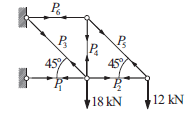


### 2a) Write the linear system for the tensions $P_i$ as equations and in matrix form
{answer}

Joint Equilibrium: ∑Fx=0, ∑Fy=0

18kN load (down): -P1 + P2 = 0 [x-direction] and P4 = 18 [y-direction]

12kN load (down): −P2 − cP5 ​​= 0 [x-direction] and cP5 = 12 [y-direction]

top with no external load: ​−cP3 + cP5 − P6 = 0 [x-direction] and −cP3 − P4 − cP5 = 0 [y-direction]

where c=sqrt(2)/2

\begin{equation}
  \begin{bmatrix}
-1 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & -1 & 0 & 0 & -c & 0 \\
0 & 0 & -c & -1 & -c & 0
  \end{bmatrix}
  %
  \begin{bmatrix}
    P_1\\ P_2 \\ P_3 \\ P_4 \\ P_5 \\ P_6
  \end{bmatrix}
  %
  =
  %
  \begin{bmatrix}
0 \\ 18 \\ 0 \\ 12 \\ 0 \\ 0
\end{bmatrix}
\end{equation}


### 2b) Solve for $P_i$ using LU decomposition and substitution.
{method, answer}

In [1]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

c = np.sqrt(2)/2
A = np.array([
    [-1,  1,  0,  0,   0,  0],
    [ 0,  0,  0,  1,   0,  0],
    [ 0, -1,  0,  0,  -c,  0],
    [ 0,  0,  0,  0,   c,  0],
    [ 0,  0, -c,  0,   c, -1],
    [ 0,  0, -c, -1,  -c,  0],
], dtype=float)

b = np.array([0, 18, 0, 12, 0, 0], dtype=float)

LU, piv = lu_factor(A) # factor once
P = lu_solve((LU, piv), b) # forward/back substitution
print(P) # [P1,P2,P3,P4,P5,P6]

[-12.         -12.         -42.42640687  18.          16.97056275
  42.        ]


*   P1 = -12kN
*   P2 = -12kN
*   P3 = -42.43kN
*   P4 = 18 kN
*   P5 = 6.97kN
*   P6 = 42kN

### 2c)  Double the loads (18 kN and 12 kN) and solve for $P_i$ again *without refactoring*.
{answer}

## Question 3

Consider the matrix:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

## 3a) Calculate the condition number of A
{answer}

## 3b) Let's use a preconditioner matrix $P$ to improve the condition number of the product $P^{-1} A$. Give 2 examples of $P$ that improve the condition number.

Can you identify the 'perfect' preconditioner? (Consider the easiest matrix to solve!)
{answer, answer}